<a href="https://colab.research.google.com/github/aravindchakravarti/Deep_Learning_EVA_4/blob/master/S13_YOLO/13B_Yolo/YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!git clone https://github.com/aravindchakravarti/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 676, done.
remote: Counting objects: 100% (676/676), done.
remote: Compressing objects: 100% (671/671), done.
remote: Total 1278 (delta 5), reused 663 (delta 1), pack-reused 602
Receiving objects: 100% (1278/1278), 18.55 MiB | 18.60 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [5]:
ls

gdrive/  sample_data/  YoloV3/


In [6]:
cd YoloV3/

/content/YoloV3


In [7]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [0]:
!mkdir weights
!cp '/content/gdrive/My Drive/YoloV3/yolov3-spp-ultralytics.pt' '/content/YoloV3/weights/'
!cp '/content/gdrive/My Drive/YoloV3/drone-youtube-1.mp4' '/content/YoloV3/'

In [9]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 12:50:28.458201: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4784.20it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 106.05it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00,

In [15]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 12:54:35.340326: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (492 found, 0 missing, 0 empty, 0 duplicate, for 492 images): 100% 492/492 [00:00<00:00, 6418.40it/s]
Caching images (0.2GB): 100% 492/492 [00:01<00:00, 442.93it/s]
Caching labels (54 found, 0 missing, 0 empty, 0 duplicate, for 54 images): 100% 54/54 [

In [19]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/546 data/customdata/images/1.jpg: 320x512 1 drones, Done. (0.019s)
image 2/546 data/customdata/images/10.jpg: 320x512 1 drones, Done. (0.017s)
image 3/546 data/customdata/images/100.jpg: 384x512 1 drones, Done. (0.019s)
image 4/546 data/customdata/images/101.jpg: 384x512 1 drones, Done. (0.016s)
image 5/546 data/customdata/images/102.jpg: 320x512 1 drones, Done. (0.019s)
image 6/546 data/customdata/images/104.jpg: 384x512 1 drones, Done. (0.018s)
image 7/546 data/customdata/images/105.jpg: 384x512 1 dr

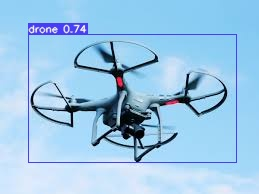

In [21]:
Image(filename='out_out/drone-2.jpg', width=600)

In [16]:
!python detect.py --source drone-youtube-1.mp4 --conf-thres 0.1 --output vid

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='vid', save_txt=False, source='drone-youtube-1.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/679) drone-youtube-1.mp4: 320x512 Done. (0.019s)
video 1/1 (2/679) drone-youtube-1.mp4: 320x512 Done. (0.017s)
video 1/1 (3/679) drone-youtube-1.mp4: 320x512 Done. (0.016s)
video 1/1 (4/679) drone-youtube-1.mp4: 320x512 Done. (0.016s)
video 1/1 (5/679) drone-youtube-1.mp4: 320x512 Done. (0.016s)
video 1/1 (6/679) drone-youtube-1.mp4: 320x512 Done. (0.016s)
video 1/1 (7/679) drone-youtube-1.mp4: 320x512 Done. (0.016s)
video 1/1 (8/679) drone-youtube-1.mp4: 320x512 Done. (0.016s)
video 1/1 (9/679) drone-yo

In [0]:
!cp '/content/YoloV3/vid/drone-youtube-1.mp4' '/content/gdrive/My Drive/YoloV3/annotated/'

In [0]:
!cp '/content/YoloV3/weights/last.pt' '/content/gdrive/My Drive/YoloV3/annotated/'